# ROCK PAPER AND SCISSORS IMAGE CLASSIFICATION PORJECT

In [7]:
!pip install keras_preprocessing


     -------------------------------------- 42.6/42.6 kB 513.3 kB/s eta 0:00:00


In [3]:
import os
import zipfile

local_zip = 'C:/Users/Ankit/Downloads/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = 'C:/Users/Ankit/Downloads/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


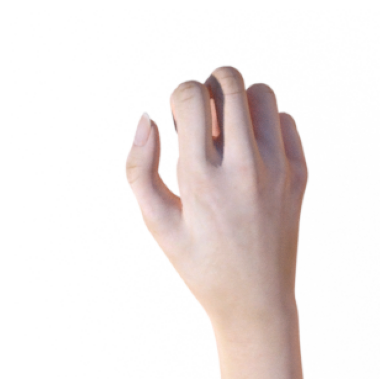

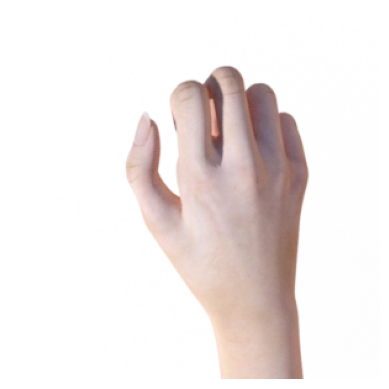

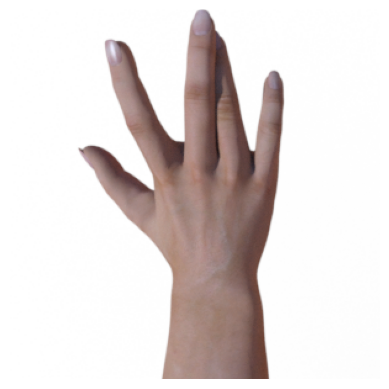

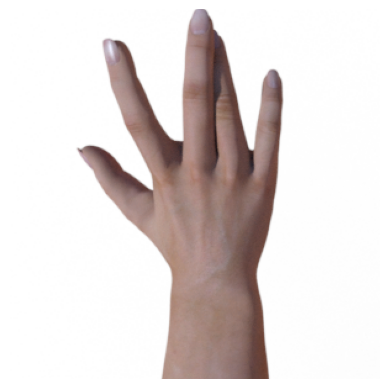

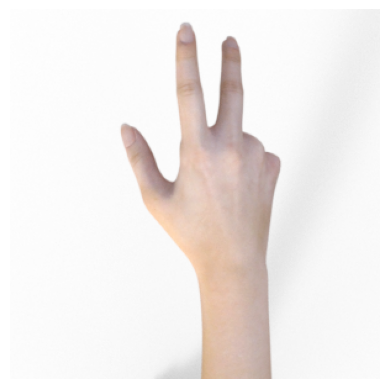

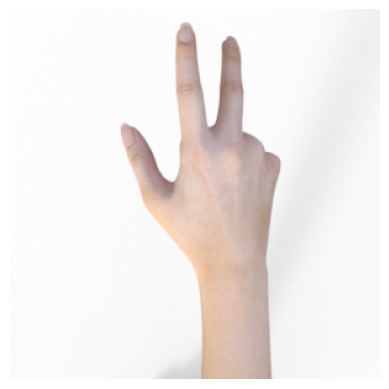

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

C:\Users\Ankit\AppData\Local\Temp\ipykernel_3336\2218931089.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)


Epoch 1/25
79/79 [==============================] - 235s 3s/step - loss: 1.1349 - accuracy: 0.4067 - val_loss: 0.7975 - val_accuracy: 0.7957
Epoch 2/25
79/79 [==============================] - 207s 3s/step - loss: 0.8888 - accuracy: 0.5607 - val_loss: 0.5958 - val_accuracy: 0.6505
Epoch 3/25
79/79 [==============================] - 205s 3s/step - loss: 0.6048 - accuracy: 0.7321 - val_loss: 0.1797 - val_accuracy: 0.9570
Epoch 4/25
79/79 [==============================] - 269s 3s/step - loss: 0.4411 - accuracy: 0.8274 - val_loss: 0.0765 - val_accuracy: 0.9839
Epoch 5/25
79/79 [==============================] - 218s 3s/step - loss: 0.2998 - accuracy: 0.8881 - val_loss: 0.0936 - val_accuracy: 0.9624
Epoch 6/25
79/79 [==============================] - 214s 3s/step - loss: 0.2609 - accuracy: 0.9079 - val_loss: 0.1389 - val_accuracy: 0.9355
Epoch 7/25
79/79 [==============================] - 249s 3s/step - loss: 0.1960 - accuracy: 0.9294 - val_loss: 0.0586 - val_accuracy: 0.9704
Epoch 8/25
79

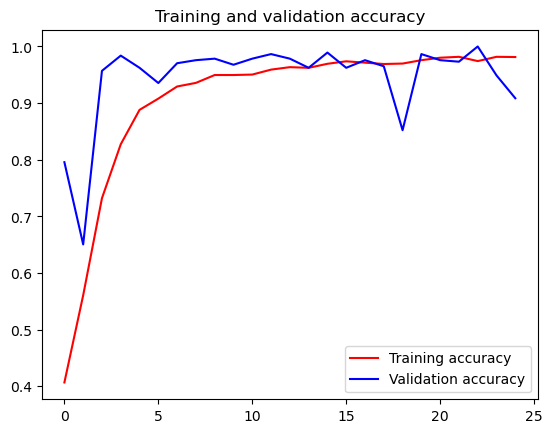

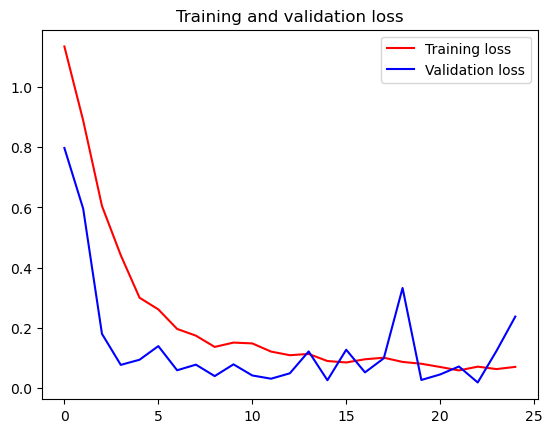

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the 'history' object
# Example: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Use the correct keys for accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plot training and validation loss
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [15]:
!pip install ipywidgets
!pip install matplotlib


In [21]:
!pip install ipywidgets pillow



FileUpload(value={}, description='Upload')

1/1 [==============================] - 0s 258ms/step


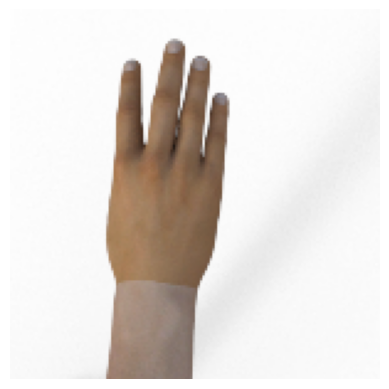

C:\Users\Ankit\Downloads\testpaper04-07.png

Predictions for testpaper04-07.png
[[0. 0. 1.]]
1/1 [==============================] - 0s 46ms/step


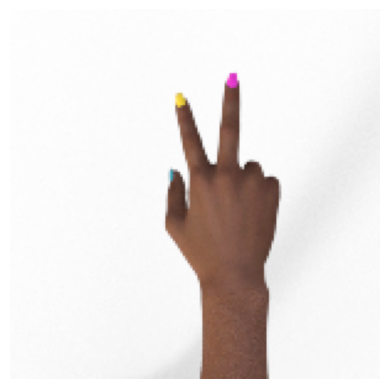

C:\Users\Ankit\Downloads\testscissors02-15.png

Predictions for testscissors02-15.png
[[0. 0. 1.]]
1/1 [==============================] - 0s 57ms/step


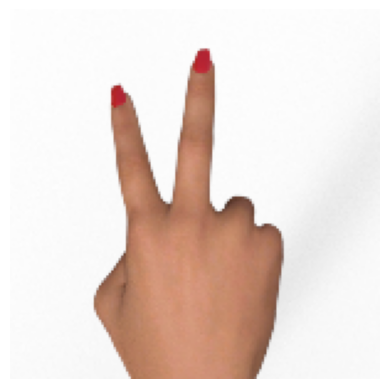

C:\Users\Ankit\Downloads\testscissors01-29.png

Predictions for testscissors01-29.png
[[0. 0. 1.]]
1/1 [==============================] - 0s 53ms/step


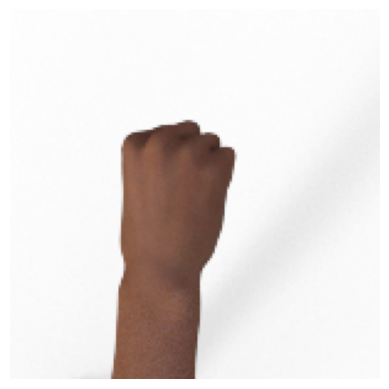

C:\Users\Ankit\Downloads\testrock02-29.png

Predictions for testrock02-29.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 49ms/step


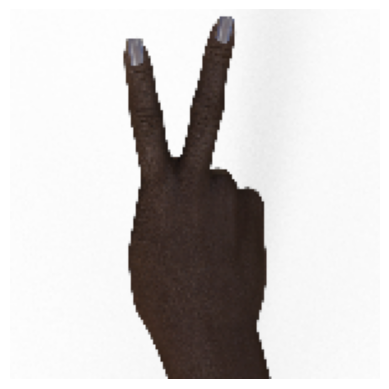

C:\Users\Ankit\Downloads\scissors-hires1.png

Predictions for scissors-hires1.png
[[0. 0. 1.]]


In [23]:
import numpy as np
from IPython.display import display, FileLink
from ipywidgets import FileUpload
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the 'model' object
# Example: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Define a file upload widget
upload_widget = FileUpload()

# Display the widget
display(upload_widget)

def on_upload_change(change):
    # Get uploaded files
    uploaded_files = upload_widget.value
    
    for fn, content in uploaded_files.items():
        # Save the uploaded file locally
        with open(fn, 'wb') as f:
            f.write(content['content'])
        
        # Predicting images
        path = fn
        img = image.load_img(path, target_size=(150, 150))  # Load and resize the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        
        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
        # Display the file link
        display(FileLink(path))
        
        print("Predictions for", fn)
        print(classes)

# Register the on_upload_change function to be called when the upload changes
upload_widget.observe(on_upload_change, names='_counter')
